# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='../data/assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [2]:
import torch
from torchvision import datasets, transforms
import sys
import matplotlib.pyplot as plt
sys.path.insert(0, '../answers')
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

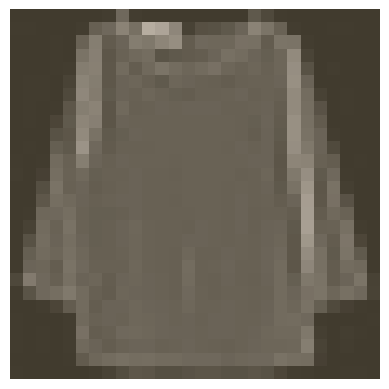

In [3]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your classifier network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.


***
### Exercise:
Build your own network based on these suggestion.

In [4]:
## Task 1:
## Your code here
from torch import nn
import torch.nn.functional as F
class Classifier(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        out = F.log_softmax(self.fc4(x),dim=1)
        return out
        
    

In [5]:
model = Classifier()
print(model)

Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


***

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.



***
### Exercise:

**Part A**: Create network (model), define loss (criterion) and define optimizer.
```python
model = 
criterion = 
optimizer = 
```

In [6]:
## Task 2:
## Your code here 
model = Classifier()
criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5,nesterov=True)

 

In [7]:
print("Model:", model)
print("Loss:", criterion)
print("Optimizer:", optimizer)

Model: Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)
Loss: NLLLoss()
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.5
    nesterov: True
    weight_decay: 0
)


**Part B**: Train the network with training loop.
- see "Part 3 - Training Neural Networks (Exercises).ipynb" for tips.
- Calculate 5 epochs and print "Training Loss:" after every epoch

In [8]:
## Task 3:
## Your code here 
training_losses = []
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images,labels in trainloader:
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
        
        output = model.forward(images)
        
        loss = criterion(output,labels)
        
        loss.backward() 
        optimizer.step()
        running_loss += loss.item()
        
    else:
        training_loss = running_loss / len(trainloader)
        print(f"training loss: {training_loss}")
        training_losses.append(training_loss)
        

training loss: 0.9690636332863684
training loss: 0.5163429755804889
training loss: 0.44888336986684596
training loss: 0.41230398924874345
training loss: 0.38498779440294706


In [9]:
print(training_losses)

[0.9690636332863684, 0.5163429755804889, 0.44888336986684596, 0.41230398924874345, 0.38498779440294706]


**Part C**: Calculate the class probabilities for network output.
- see "Part 3 - Training Neural Networks (Exercises).ipynb" for tips.

Label: Ankle boot


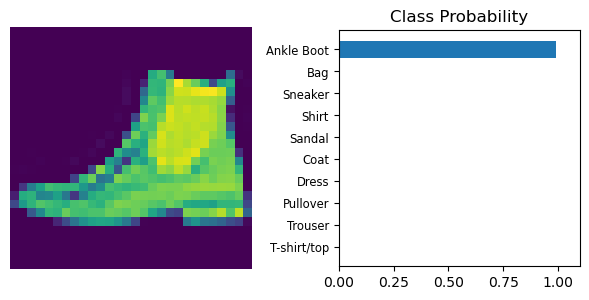

In [16]:
## Task 4:
## Your code here

mapping = {
    0:"T-shirt/top",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle boot"}

%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)

with torch.no_grad():
    log_probs = model(img)
    probabilities = torch.exp(log_probs)

ps = torch.exp(log_probs)
helper.view_classify(img.view(1, 28, 28), ps, version="Fashion")
print("Label:", mapping[labels[0].item()])


In [11]:
print(probabilities)

tensor([[4.7718e-03, 2.7979e-04, 3.2434e-01, 2.8816e-03, 3.6489e-01, 1.8675e-04,
         2.9356e-01, 1.5158e-06, 9.0718e-03, 1.8748e-05]])


***

## Reflection

- Does network Training Loss decrease monotonously? And why this is important?
- Re-train network few times. Where network is unsure? How about if you train it only 1 epoch? 


## Does network Training Loss decrease monotonously? And why this is important?

Kyllä oikeastaan, aluksi ottaa hieman suuremman harppauksen, jonka jälkeen vauhti tasaantuu. On tärkeää että se laskee suhteellisen tasaisesti, muuten se tarkoittaisi että malli ei välttämättä opi mitään.

## Re-train network few times. Where network is unsure? How about if you train it only 1 epoch?
Esim huppareita se ei osaa varmasti tunnistaa, vaan sekottaa ne takkeihin ja paitoihin. Myös jotkut mekot aiheuttavat hankaluuksia, mutta niin ne kyllä aiheuttaa minullekkin. Toisinsanoen, kuvat on yhteläisiä muiden luokkien kanssa.

Yhden epochin jälkeen, todennäköisyydet on aika tasan mallissa, joten se ei opi mitään monimutkaisia tai hienovaraisia eroja kappaleissa, sekä suorituskyky on huono.

### Check your answers by running following cell:

In [12]:
# Do not change this code!

import sys
sys.path.insert(0, '../answers/part4/')
from part4_check import *


print("Results:\n")

print("Model:", model)
print("Loss:", criterion)
print("Optimizer:", optimizer)

training_losses_check(training_losses)
probabilities_check(probabilities)


Results:

Model: Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)
Loss: NLLLoss()
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.5
    nesterov: True
    weight_decay: 0
)

 [0.9690636332863684, 0.5163429755804889, 0.44888336986684596, 0.41230398924874345, 0.38498779440294706]
'training_losses' first element is not on correct level. Please check your answer.

 tensor([[4.7718e-03, 2.7979e-04, 3.2434e-01, 2.8816e-03, 3.6489e-01, 1.8675e-04,
         2.9356e-01, 1.5158e-06, 9.0718e-03, 1.8748e-05]])
'probabilities' is ok!


### Great work!